Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Caleb Andree"
COLLABORATORS = ""

---

# Lab 4: Data Structures [Total: 5 points]

## Instructions

The purpose of this assignment is for you to practice with common data formats such as JSON, XML, and SQL. You will carry out these tasks in the present notebook, and use the notebook document the various steps of the exercise and to answer all questions in it.

<div class="alert alert-info">
To grade your submission we will run your code into the autograder. The autograder will compare the value returned by your function (i.e. the student's answer) against the correct answer and if it differs it will shows you what rows / columns of the data frame are different.
</div>


## Required skills

This lab will let you practice the following skills:
- Extracting data from JSON objects
- Normalizing JSON objects for data frames
- Connecting to SQLite databases
- Converting SQL results into data frames

Before you start working on it, review Chapter 13, of the &ldquo;Python 4 Everybody&rdquo; textbook and/or the notebooks posted on ELMS under &ldquo;Data Formats module&rdquo;.

## Table of Contents
<ul>
    <li><a href="#Submission-checklist">Submission checklist</a> [1 point]</li>
    <li><a href="#Q1">Question 1</a> [1 point]</li>
    <li><a href="#Q2">Question 2</a> [1 point]</li>
    <li><a href="#Q3">Question 3</a> [1 point]</li>
    <li><a href="#Q4">Question 4</a> [1 point]</li>
</ul>

## Submission checklist

**Points**: 1

Before submitting make sure that:

1. Your name is included above, plus the name of any collaborator you worked with;
2. All Markdown cells you edited are rendering correctly, especially the ones with answers.
3. You have removed any `raise NotImplementedError()` line from your code cells.

## Q1

**Points**: 1

Write a function called `find_by_name` that finds the team a player plays on or the name of the city in which a stadium is located.

Your function should take three parameters:
1. A JSON string that can be either a list of players or a list of stadiums
2. A name
3. An optional key in the JSON object. If it is included, then the list of elements should be retrieved from that key.

Your function should find the object whose name attribute is equal to the passed name, and it should return a string with the value of the second attribute in the object.

### Examples

For example, if the JSON string is 
```
[{'name': 'Gazinsky', 'team': 'Russia'},
 {'name': 'Dzyuba', 'team': 'Russia'},
 {'name': 'Lukaku', 'team': 'Belgium'}]
```
and the name is `Gazinsky`, then your function should return `Russia`. (The key is omitted in this case.)


If instead the JSON string is
```
{'stadiums': [{'name': 'Ekaterinburg Arena', 'city': 'Ekaterinburg'},
              {'name': 'Luzhniki Stadium', 'city': 'Moscow'},
              {'name': 'Nizhny Novgorod Stadium', 'city': 'Nizhny Novgorod'}]}
```
the name is `Luzhniki Stadium`, and the key is `stadiums`, then your function should return `Moscow`.

In [2]:
import json

def find_by_name(json_str, name, key=None):
# YOUR CODE HERE
    data = json.loads(json_str)
    if key:
        if key in data:
            data = data[key]
    for item in data:
        if 'name' in item and item['name'] == name:
            if 'team' in item:
                return item['team']
            elif 'city' in item:
                return item['city']
        
#raise NotImplementedError()

Use the cell below to run your function and see what it returns. You should probably try different inputs as well.

In [3]:
import json

test_json_str = '[{"name":"Gazinsky","team":"Russia"},{"name":"Dzyuba","team":"Russia"},{"name":"Lukaku","team":"Belgium"}]'

test_name = 'Gazinsky'
test_key = None

find_by_name(test_json_str, test_name, key=test_key)

'Russia'

In [4]:
import json

players = '[{"name":"Gazinsky","team":"Russia"},{"name":"Dzyuba","team":"Russia"},{"name":"Lukaku","team":"Belgium"}]'
stadium_data = '{"stadiums":[{"name": "Ekaterinburg Arena","city": "Ekaterinburg"},{"name": "Luzhniki Stadium","city": "Moscow"},{"name": "Nizhny Novgorod Stadium","city": "Nizhny Novgorod"}]}'

q1STUDENT_ANS_1 = find_by_name(players, "Gazinsky")
q1CORRECT_ANS_1 = "Russia"
assert q1STUDENT_ANS_1 == q1CORRECT_ANS_1, f"Error: Your solution returned {q1STUDENT_ANS_1!r}. Correct answer: {q1CORRECT_ANS_1!r}"

q1STUDENT_ANS_2 = find_by_name(stadium_data, "Luzhniki Stadium", key="stadiums")
q1CORRECT_ANS_2 = "Moscow"
assert q1STUDENT_ANS_2 == q1CORRECT_ANS_2, f"Error: Your solution returned {q1STUDENT_ANS_2!r}. Correct answer: {q1CORRECT_ANS_2!r}"

q1STUDENT_ANS_3 = find_by_name(players, "Lukaku")
q1CORRECT_ANS_3 = "Belgium"
assert q1STUDENT_ANS_3 == q1CORRECT_ANS_3, f"Error: Your solution returned {q1STUDENT_ANS_3!r}. Correct answer: {q1CORRECT_ANS_3!r}"

q1STUDENT_ANS_4 = find_by_name(stadium_data, "Ekaterinburg Arena", key="stadiums")
q1CORRECT_ANS_4 = "Ekaterinburg"
assert q1STUDENT_ANS_4 == q1CORRECT_ANS_4, f"Error: Your solution returned {q1STUDENT_ANS_4!r}. Correct answer: {q1CORRECT_ANS_4!r}"

print("All tests passed! 👍")

All tests passed! 👍


## Q2

**Points**: 1

Write a function called `teams_by_continent` that compute the number of teams participating in the World Cup for each continent.

Your function should not take any parameters; it should read the appropriate JSON file, convert it to data frame, and then aggregate its rows by the continent column.

This is what the data frame should look like:

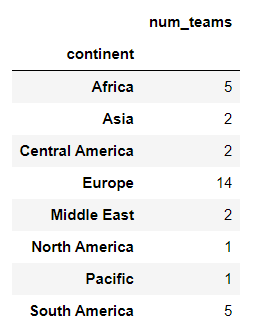    

In [5]:
import pandas as pd
import json
import os

def teams_by_continent():
    # YOUR CODE HERE
    data = pd.read_json('worldcup.teams.json')

    #Convert the 'teams' column to a DataFrame
    teams_df = pd.DataFrame(list(data['teams']))

    #Extract the 'continent' from the 'teams' DataFrame
    teams_df['continent'] = teams_df['continent']

    #Aggregate the data by the 'continent' column and count the number of teams per continent
    continent_counts = teams_df['continent'].value_counts().reset_index()
    continent_counts.columns = ['continent', 'num_teams']
    continent_counts.set_index('continent', inplace=True)


    return continent_counts.sort_index()
    #raise NotImplementedError()

Use the cell below to run your function and see what it returns.

In [6]:
teams_by_continent()

,num_teams
continent,
Africa,5
Asia,2
Central America,2
Europe,14
Middle East,2
North America,1
Pacific,1
South America,5


In [7]:
import pandas as pd
import json
from pandas.testing import assert_frame_equal

q2CORRECT_ANSWER = pd.read_csv(".solutionq2.csv", index_col=0)
q2STUDENT_ANSWER = teams_by_continent()

# Function should return a DataFrame
assert type(q2STUDENT_ANSWER) is pd.DataFrame, f"Error: expected DataFrame, got {type(q2STUDENT_ANSWER)} instead."

# Return value should match solution
try:
    assert_frame_equal(q2STUDENT_ANSWER, q2CORRECT_ANSWER)
    #if no test failed, print
    print("All tests passed! 👍")
except AssertionError:
    print("Error: your solution does not match the correct one. See above for mismatching entries.")
    print()
    idx = q2STUDENT_ANSWER != q2CORRECT_ANSWER
    print("Mismatching entries")
    print("===================")
    print()
    print("Correct: ")
    print(q2CORRECT_ANSWER[idx])
    print()
    print("Student:")
    print(q2STUDENT_ANSWER[idx])

All tests passed! 👍


## Q3

**Points**: 1

Write a function called `store_to_database` that stores data about matches from JSON and stores it as an table into an SQLite database.

Your function should create an empty SQLite file named `worldcupmatches.sqlite`. It should store the contents of the data frame into the table. Finally, it should return the number of rows created in the table.

Note:
1. The table name must be `matches`
2. Only include the following columns:
    - "city"
    - "date"
    - "team1.name"
    - "team2.name"
    - "stadium.name"
3. For the autograder to pass, the name of database must be `worldcupmatches.sqlite`.

This is what the stored data frame should look like (only the first 5 rows are displayed here):

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>city</th>
      <th>date</th>
      <th>team1.name</th>
      <th>team2.name</th>
      <th>stadium.name</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Moscow</td>
      <td>2018-06-14</td>
      <td>Russia</td>
      <td>Saudi Arabia</td>
      <td>Luzhniki Stadium</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Ekaterinburg</td>
      <td>2018-06-15</td>
      <td>Egypt</td>
      <td>Uruguay</td>
      <td>Ekaterinburg Arena</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Sochi</td>
      <td>2018-06-15</td>
      <td>Portugal</td>
      <td>Spain</td>
      <td>Fisht Stadium</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Saint Petersburg</td>
      <td>2018-06-15</td>
      <td>Morocco</td>
      <td>Iran</td>
      <td>Saint Petersburg Stadium</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Kazan</td>
      <td>2018-06-16</td>
      <td>France</td>
      <td>Australia</td>
      <td>Kazan Arena</td>
    </tr>
  </tbody>
</table>

### Hint

If your code does not pass the test, look for these possible issues:
    
1. The filename of the database is not `worldcupmatches.sqlite`
2. The table `matches` is not created
3. The column names specified are not present in the table

---
### Note about the autograder

Note that to pass the tests your code return the number of rows AND must create a new file. To make sure a new file is actually created, before testing your code the autograder will delete any existing file with the same name as `worldcupmatches.sqlite`. The autograder will also clean up after itself so any file called `worldcupmatches.sqlite` created by running your code will be deleted after passing the test. But if a test fails the autograder will stop and you can inspect the file your code created (if any was created at all).

In [8]:
import sqlite3
import pandas as pd
import json

def store_to_database():
    # YOUR CODE HERE
    #Create a DataFrame with selected columns
    data = pd.read_json('worldcup.json')
    matches = []
    for round_data in data.get('rounds', []):
        for match in round_data.get('matches', []):
            match_info = {
                'city': match.get('city', ''),
                'date': match.get('date', ''),
                'team1.name': match.get('team1', {}).get('name', ''),
                'team2.name': match.get('team2', {}).get('name', ''),
                'stadium.name': match.get('stadium', {}).get('name', ''),
            }
            matches.append(match_info)

    matches_df = pd.DataFrame(matches)

    #Create an SQLite database and insert data using the to_sql method
    conn = sqlite3.connect('worldcupmatches.sqlite')
    matches_df.to_sql('matches', conn, if_exists='replace', index=False)

    #Close the database connection
    conn.close()

    return len(matches_df)
    #raise NotImplementedError()

Use the cell below to run your function to test your function. To check your database, you may want to add additional code that reads the database created and prints its content.

In [9]:
store_to_database()

64

In [10]:
import os
import os.path
import pandas as pd
import sqlite3
from contextlib import closing
from pandas.testing import assert_frame_equal

print("⚠️ NOTE: I will be deleting any new file I create after completing autograding. ⚠️")
print("⚠️ NOTE: If your code fails a test the file for that test (if any) will not be deleted so you can inspect it. ⚠️")
print()

FILENAME = "worldcupmatches.sqlite"
q3CORRECT_ANSWER_LEN = 64
q3CORRECT_ANSWER_DF = pd.read_csv(".q3solution.csv")

try:
    if os.path.exists(FILENAME):
        os.remove(FILENAME)
except IOError:
    print(f"Warning: there was an error deleting {FILENAME}!")
    pass

# Run student function
q3STUDENT_ANSWER_LEN = store_to_database()

# Function should return an int
assert type(q3STUDENT_ANSWER_LEN) is int, f"Error: expected integer, got {type(q3STUDENT_ANSWER_LEN)} instead."

# Return value should match solution
assert q3STUDENT_ANSWER_LEN == q3CORRECT_ANSWER_LEN, f"Error: Your solution returned {q3STUDENT_ANSWER_LEN}. Correct answer: {q3CORRECT_ANSWER}"

# Read data from student solution file into a data frame
with closing(sqlite3.connect(FILENAME)) as con:
    q = "SELECT * FROM matches"
    q3STUDENT_ANSWER_DF = pd.read_sql_query(q, con)

# Data frame should match solution
try:
    assert_frame_equal(q3STUDENT_ANSWER_DF, q3CORRECT_ANSWER_DF)
    # if no test failed, print
    print("All tests passed! 👍")
    
    # and delete file
    try:
        if os.path.exists(FILENAME):
            os.remove(FILENAME)
    except IOError:
        print(f"Warning: there was an error deleting {FILENAME}!")
        pass
except AssertionError:
    print("Error: your solution does not match the correct one. See above for mismatching entries.")
    print()
    idx = q3STUDENT_ANSWER_DF != q3CORRECT_ANSWER_DF
    print("Mismatching entries")
    print("===================")
    print()
    print("Correct: ")
    print(q3CORRECT_ANSWER_DF[idx])
    print()
    print("Student:")
    print(q3STUDENT_ANSWER_DF[idx])

⚠️ NOTE: I will be deleting any new file I create after completing autograding. ⚠️
⚠️ NOTE: If your code fails a test the file for that test (if any) will not be deleted so you can inspect it. ⚠️

All tests passed! 👍


## Q4 

**Points**: 1

Write a function called `tied_matches` that, given a database of World Cup match results stored in file `worldcup2018.sqlite`, it prints the matches that resulted in a tie. 

Your function should not take any parameter. It should open the appropiate database file, it should select all the ties, and it should return a data frame with two columns: the names of the teams that played (named `team1.name` and `team2.name` respectively).

A table called `matches` is present in the database and it looks like the following:
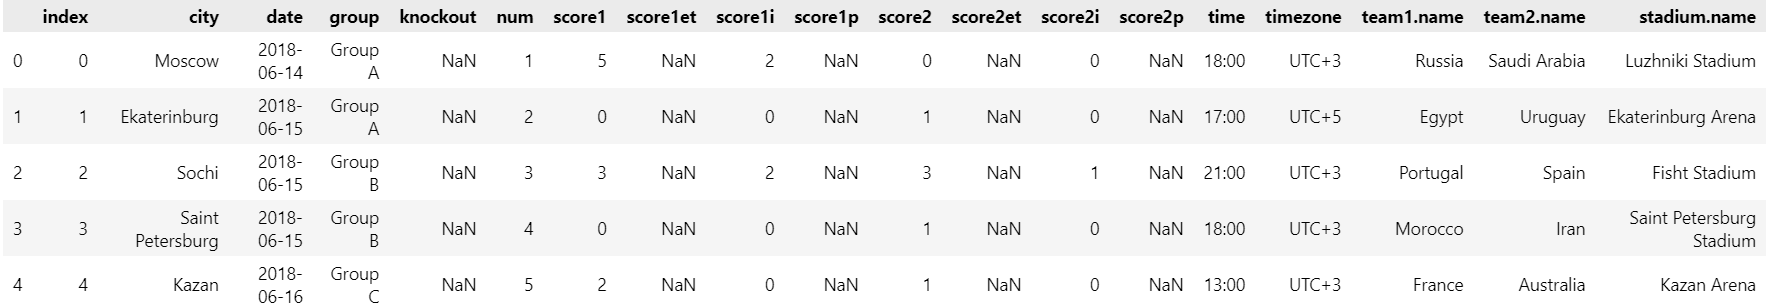

An sql query is given to you. It selects all the rows in the matches. Follow the below procedure for the question:
1. connect to sqllite3 database using pandas.
2. execute the given query. This must give you a dataframe which looks like above.
3. Create a dataframe with only the team names where the matches resulted in a tie. A match is a tie when score1 is equal to score2.

This is what your data frame should look like:

   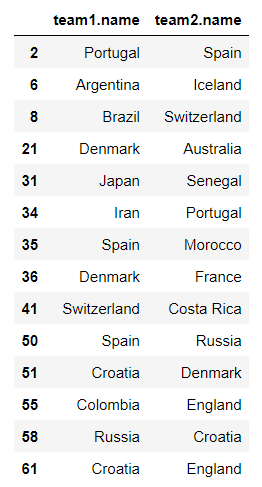

In [11]:
import sqlite3
import pandas as pd

q = "SELECT * FROM matches"

def tied_matches():
    # YOUR CODE HERE
    conn = sqlite3.connect('worldcup2018.sqlite')

    #Execute the given SQL query to select all rows in the 'matches' table
    all_matches_df = pd.read_sql_query(q, conn)

    tied_matches_df = all_matches_df[all_matches_df['score1'] == all_matches_df['score2']]

    team_names_df = tied_matches_df[['team1.name', 'team2.name']]
    team_names_df.columns = ['team1.name', 'team2.name']

    
    #Close the database connection
    conn.close()
    
    return team_names_df
    #raise NotImplementedError()

Use the cell below to run your function to test your function.

In [12]:
tied_matches()

,team1.name,team2.name
2,Portugal,Spain
6,Argentina,Iceland
8,Brazil,Switzerland
21,Denmark,Australia
31,Japan,Senegal
34,Iran,Portugal
35,Spain,Morocco
36,Denmark,France
41,Switzerland,Costa Rica
50,Spain,Russia


In [13]:
import sqlite3
import pandas as pd
from pandas.testing import assert_frame_equal

q4CORRECT_ANSWER = pd.read_csv(".solutionq4.csv", index_col=0)
q4STUDENT_ANSWER = tied_matches()

# Function should return a DataFrame
assert type(q4STUDENT_ANSWER) is pd.DataFrame, f"Error: expected DataFrame, got {type(q4STUDENT_ANSWER)} instead."

# Return value should match solution
try:
    assert_frame_equal(q4STUDENT_ANSWER, q4CORRECT_ANSWER)
    #if no test failed, print
    print("All tests passed! 👍")
except AssertionError:
    print("Error: your solution does not match the correct one. See above for mismatching entries.")
    print()
    idx = q4STUDENT_ANSWER != q4CORRECT_ANSWER
    print("Mismatching entries")
    print("===================")
    print()
    print("Correct: ")
    print(q4CORRECT_ANSWER[idx])
    print()
    print("Student:")
    print(q4STUDENT_ANSWER[idx])

All tests passed! 👍
